In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(
    filepath_or_buffer='/content/drive/MyDrive/Satelite_Numeric_data/New Dataset 5000.csv')


In [ ]:
df.head()

StationId        Datetime  PM2.5  PM10    NO    NO2    NOx    NH3    CO  \
0     TG002  5/14/2018 0:00  35.25  88.5  2.12  33.10  19.30  14.10  0.96   
1     TG002  5/14/2018 1:00  32.00  73.5  2.17  20.30  12.60  13.80  0.17   
2     TG002  5/14/2018 2:00  20.50  58.0  3.00  17.35  11.65  13.48  1.53   
3     TG002  5/14/2018 3:00  21.00  50.0  2.73  18.28  11.93  13.50  2.96   
4     TG002  5/14/2018 4:00  18.50  43.5  2.20  16.38  10.45  15.13  3.49   

    SO2     O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  1.97  67.25     4.98     7.43    2.70  168   Moderate  
1  2.77  80.75     3.40     4.27    1.57  124   Moderate  
2  2.95  77.22     2.02     2.55    1.18  124   Moderate  
3  2.02  36.35     1.42     1.57    0.80  124   Moderate  
4  2.20  70.90     1.20     1.10    1.03  124   Moderate

In [ ]:
df = df.drop(['StationId', 'Datetime', 'PM2.5', 'PM10', 'AQI_Bucket'], axis=1)

In [ ]:
df.tail()

NO     NO2    NOx    NH3    CO   SO2     O3  Benzene  Toluene  \
5086   3.55   91.53  51.58  17.98  0.87  3.45  42.12     3.30     7.35   
5087   4.97  121.20  68.53  21.15  1.21  3.00  13.75     6.22    16.48   
5088  17.82  142.17  90.10  20.10  1.48  4.05   2.42     8.55    23.40   
5089  22.60  144.02  94.95  20.75  1.45  3.97   1.20     9.62    24.93   
5090  12.47  134.22  81.55  21.70  1.29  2.00   4.97     9.65    22.52   

      Xylene  AQI  
5086    3.00  106  
5087    8.20  106  
5088   12.93  106  
5089   15.65  107  
5090   15.62  108

In [ ]:
df.columns=['NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()

NO     NO2    NOx    NH3    CO   SO2     O3  Benzene  Toluene  \
5086   3.55   91.53  51.58  17.98  0.87  3.45  42.12     3.30     7.35   
5087   4.97  121.20  68.53  21.15  1.21  3.00  13.75     6.22    16.48   
5088  17.82  142.17  90.10  20.10  1.48  4.05   2.42     8.55    23.40   
5089  22.60  144.02  94.95  20.75  1.45  3.97   1.20     9.62    24.93   
5090  12.47  134.22  81.55  21.70  1.29  2.00   4.97     9.65    22.52   

      Xylene  AQI  
5086    3.00  106  
5087    8.20  106  
5088   12.93  106  
5089   15.65  107  
5090   15.62  108

In [ ]:
X = df.loc[:, 'NO':'Xylene'].values
y = df['AQI'].values

In [ ]:
y.shape

(5091,)

<ipython-input-10-06661c24c8d1>:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


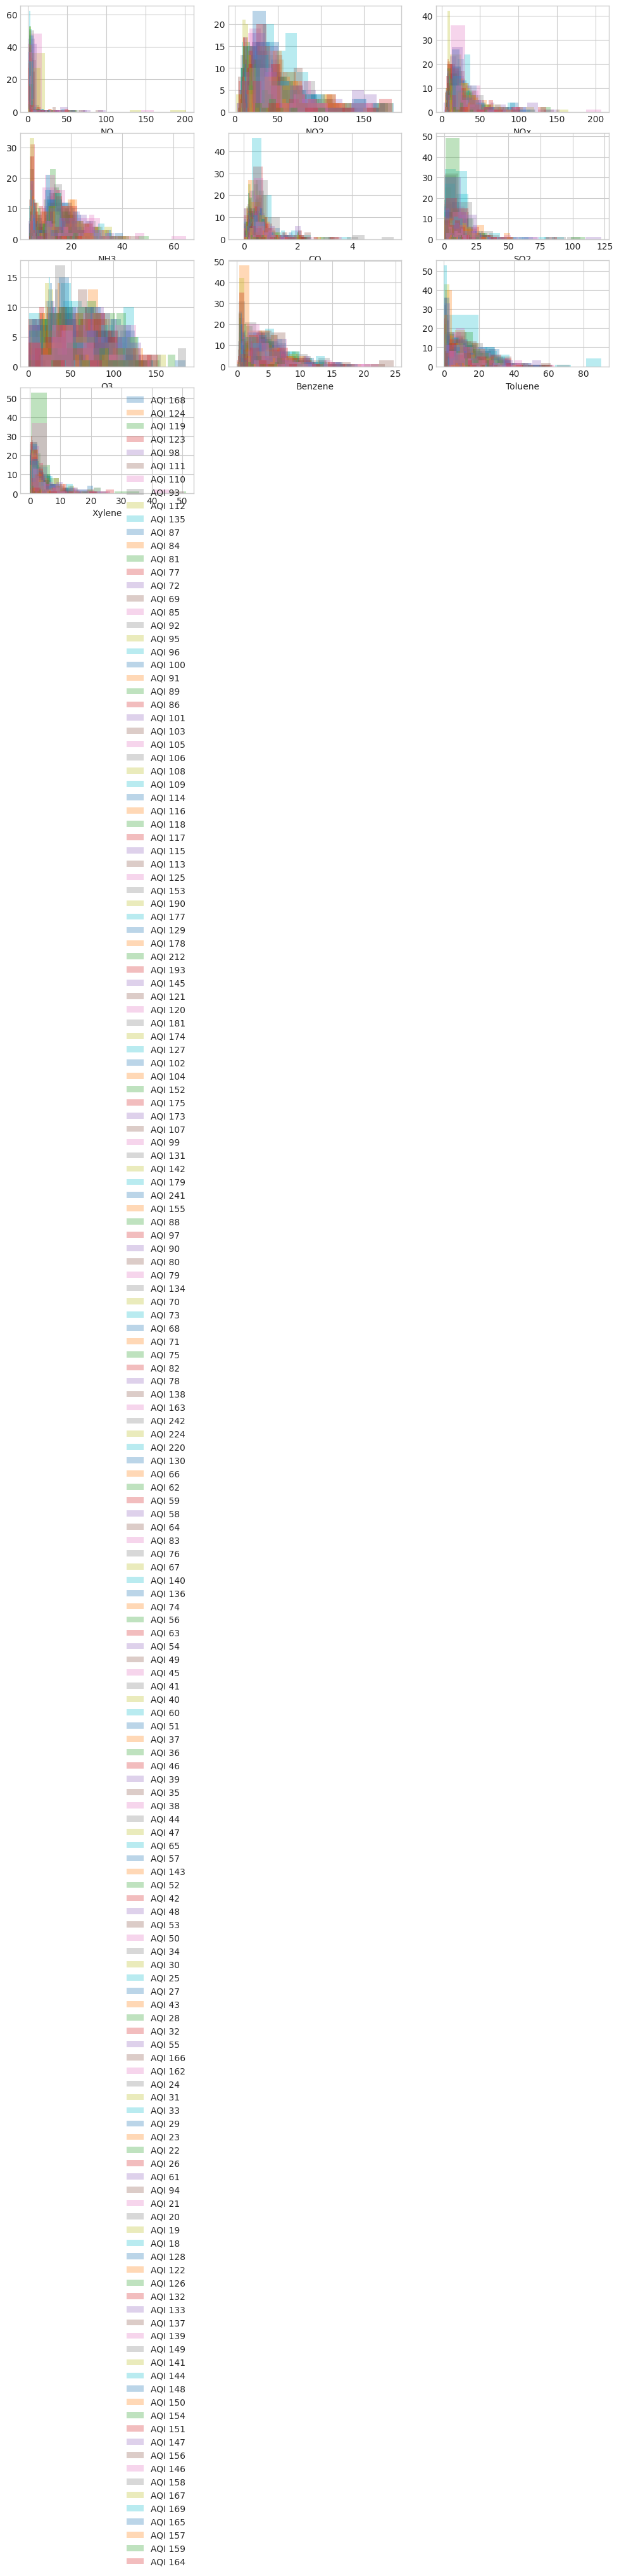

In [ ]:
feature_dict = {
    0: 'NO',
    1: 'NO2',
    2: 'NOx',
    3: 'NH3',
    4: 'CO',
    5: 'SO2',
    6: 'O3',
    7: 'Benzene',
    8: 'Toluene',
    9: 'Xylene'
}

plt.figure(figsize=(12, 10))
with plt.style.context('seaborn-whitegrid'):
    for cnt in range(10):  # There are 10 features in your data
        plt.subplot(4, 3, cnt + 1)
        for aqi_value in df['AQI'].unique():
            plt.hist(X[y == aqi_value, cnt], label=f'AQI {aqi_value}', bins=10, alpha=0.3)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [ ]:
# COvariance matrix

import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00019646  0.33629993  0.60819     0.12478496  0.33434546  0.06893179
  -0.17353783  0.35952751  0.29052589  0.39498179]
 [ 0.33629993  1.00019646  0.95180691  0.56778598  0.62938985  0.41621007
  -0.06808116  0.7453067   0.6095303   0.70238404]
 [ 0.60819     0.95180691  1.00019646  0.51820875  0.64131299  0.37264625
  -0.11185871  0.74574032  0.60837258  0.72126447]
 [ 0.12478496  0.56778598  0.51820875  1.00019646  0.43778267  0.31927145
   0.30422181  0.59247188  0.47082993  0.35179404]
 [ 0.33434546  0.62938985  0.64131299  0.43778267  1.00019646  0.1846075
   0.09574923  0.56839049  0.45755021  0.53172383]
 [ 0.06893179  0.41621007  0.37264625  0.31927145  0.1846075   1.00019646
   0.24319169  0.41650239  0.38614127  0.17990277]
 [-0.17353783 -0.06808116 -0.11185871  0.30422181  0.09574923  0.24319169
   1.00019646  0.00348086 -0.03954711 -0.1388311 ]
 [ 0.35952751  0.7453067   0.74574032  0.59247188  0.56839049  0.41650239
   0.00348086  1.00019646  0.8665

In [ ]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))


NumPy covariance matrix: 
[[ 1.00019646  0.33629993  0.60819     0.12478496  0.33434546  0.06893179
  -0.17353783  0.35952751  0.29052589  0.39498179]
 [ 0.33629993  1.00019646  0.95180691  0.56778598  0.62938985  0.41621007
  -0.06808116  0.7453067   0.6095303   0.70238404]
 [ 0.60819     0.95180691  1.00019646  0.51820875  0.64131299  0.37264625
  -0.11185871  0.74574032  0.60837258  0.72126447]
 [ 0.12478496  0.56778598  0.51820875  1.00019646  0.43778267  0.31927145
   0.30422181  0.59247188  0.47082993  0.35179404]
 [ 0.33434546  0.62938985  0.64131299  0.43778267  1.00019646  0.1846075
   0.09574923  0.56839049  0.45755021  0.53172383]
 [ 0.06893179  0.41621007  0.37264625  0.31927145  0.1846075   1.00019646
   0.24319169  0.41650239  0.38614127  0.17990277]
 [-0.17353783 -0.06808116 -0.11185871  0.30422181  0.09574923  0.24319169
   1.00019646  0.00348086 -0.03954711 -0.1388311 ]
 [ 0.35952751  0.7453067   0.74574032  0.59247188  0.56839049  0.41650239
   0.00348086  1.00019646 

In [ ]:
# Eigen Vector and eigen values on standarized data x // covariance matrix

cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-2.19409922e-01  3.89778417e-01 -2.40704428e-01 -3.85584476e-01
   6.25111175e-01 -2.10257008e-02  8.67759618e-02 -8.53138791e-02
  -3.99343330e-01 -1.66818402e-01]
 [-3.96622389e-01  1.84027550e-02 -6.24942354e-01  2.32660343e-02
  -1.71146979e-02 -1.05291558e-02 -4.18706975e-01  2.48436099e-01
   4.54766298e-01 -8.36993228e-02]
 [-4.05762227e-01  1.41700392e-01  7.42618419e-01 -1.07607082e-01
   1.87715293e-01 -1.14617198e-02 -3.25140766e-01  1.81722156e-01
   2.52522850e-01 -1.19753758e-01]
 [-2.83960814e-01 -3.79954398e-01  2.65502669e-03 -1.97385887e-01
  -2.30770763e-01 -1.43396196e-01  3.47415008e-01 -1.27665605e-01
   2.57732754e-02 -7.24261764e-01]
 [-3.14791219e-01 -1.29291446e-02 -2.30486922e-03 -4.56546556e-01
  -1.62930769e-01 -2.57750261e-02  1.79396187e-01 -5.41614410e-01
   2.93178664e-01  5.03592670e-01]
 [-2.01573118e-01 -4.10866915e-01  8.41526849e-04  4.90635326e-01
   6.06265034e-01 -5.66568417e-02  3.14891970e-01 -1.02201688e-01
   2.12768036e-01  

In [ ]:
# Eigen value and vector on correlation matrix

cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-2.19409922e-01 -3.89778417e-01  2.40704428e-01  3.85584476e-01
  -6.25111175e-01  2.10257008e-02 -8.67759618e-02 -8.53138791e-02
  -3.99343330e-01 -1.66818402e-01]
 [-3.96622389e-01 -1.84027550e-02  6.24942354e-01 -2.32660343e-02
   1.71146979e-02  1.05291558e-02  4.18706975e-01  2.48436099e-01
   4.54766298e-01 -8.36993228e-02]
 [-4.05762227e-01 -1.41700392e-01 -7.42618419e-01  1.07607082e-01
  -1.87715293e-01  1.14617198e-02  3.25140766e-01  1.81722156e-01
   2.52522850e-01 -1.19753758e-01]
 [-2.83960814e-01  3.79954398e-01 -2.65502669e-03  1.97385887e-01
   2.30770763e-01  1.43396196e-01 -3.47415008e-01 -1.27665605e-01
   2.57732754e-02 -7.24261764e-01]
 [-3.14791219e-01  1.29291446e-02  2.30486922e-03  4.56546556e-01
   1.62930769e-01  2.57750261e-02 -1.79396187e-01 -5.41614410e-01
   2.93178664e-01  5.03592670e-01]
 [-2.01573118e-01  4.10866915e-01 -8.41526849e-04 -4.90635326e-01
  -6.06265034e-01  5.66568417e-02 -3.14891970e-01 -1.02201688e-01
   2.12768036e-01  

In [ ]:
cor_mat1 # correlation matrix

array([[ 1.        ,  0.33623388,  0.60807054,  0.12476045,  0.33427978,
         0.06891825, -0.17350374,  0.35945689,  0.29046882,  0.39490421],
       [ 0.33623388,  1.        ,  0.95161995,  0.56767445,  0.62926622,
         0.41612832, -0.06806778,  0.7451603 ,  0.60941057,  0.70224607],
       [ 0.60807054,  0.95161995,  1.        ,  0.51810696,  0.64118702,
         0.37257305, -0.11183674,  0.74559384,  0.60825308,  0.72112279],
       [ 0.12476045,  0.56767445,  0.51810696,  1.        ,  0.43769668,
         0.31920874,  0.30416205,  0.59235551,  0.47073745,  0.35172494],
       [ 0.33427978,  0.62926622,  0.64118702,  0.43769668,  1.        ,
         0.18457124,  0.09573042,  0.56827884,  0.45746033,  0.53161938],
       [ 0.06891825,  0.41612832,  0.37257305,  0.31920874,  0.18457124,
         1.        ,  0.24314392,  0.41642058,  0.38606542,  0.17986744],
       [-0.17350374, -0.06806778, -0.11183674,  0.30416205,  0.09573042,
         0.24314392,  1.        ,  0.00348018

In [ ]:
# eigen value on original x

cor_mat2 = np.corrcoef(X.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-2.19409922e-01 -3.89778417e-01  2.40704428e-01  3.85584476e-01
  -6.25111175e-01  2.10257008e-02 -8.67759618e-02 -8.53138791e-02
  -3.99343330e-01 -1.66818402e-01]
 [-3.96622389e-01 -1.84027550e-02  6.24942354e-01 -2.32660343e-02
   1.71146979e-02  1.05291558e-02  4.18706975e-01  2.48436099e-01
   4.54766298e-01 -8.36993228e-02]
 [-4.05762227e-01 -1.41700392e-01 -7.42618419e-01  1.07607082e-01
  -1.87715293e-01  1.14617198e-02  3.25140766e-01  1.81722156e-01
   2.52522850e-01 -1.19753758e-01]
 [-2.83960814e-01  3.79954398e-01 -2.65502669e-03  1.97385887e-01
   2.30770763e-01  1.43396196e-01 -3.47415008e-01 -1.27665605e-01
   2.57732754e-02 -7.24261764e-01]
 [-3.14791219e-01  1.29291446e-02  2.30486922e-03  4.56546556e-01
   1.62930769e-01  2.57750261e-02 -1.79396187e-01 -5.41614410e-01
   2.93178664e-01  5.03592670e-01]
 [-2.01573118e-01  4.10866915e-01 -8.41526849e-04 -4.90635326e-01
  -6.06265034e-01  5.66568417e-02 -3.14891970e-01 -1.02201688e-01
   2.12768036e-01  

In [ ]:
# SVD

u,s,v = np.linalg.svd(X_std.T)
u

array([[-2.19409922e-01,  3.89778417e-01,  3.85584476e-01,
        -6.25111175e-01, -3.99343330e-01, -1.66818402e-01,
        -8.53138791e-02,  8.67759618e-02, -2.10257008e-02,
         2.40704428e-01],
       [-3.96622389e-01,  1.84027550e-02, -2.32660343e-02,
         1.71146979e-02,  4.54766298e-01, -8.36993228e-02,
         2.48436099e-01, -4.18706975e-01, -1.05291558e-02,
         6.24942354e-01],
       [-4.05762227e-01,  1.41700392e-01,  1.07607082e-01,
        -1.87715293e-01,  2.52522850e-01, -1.19753758e-01,
         1.81722156e-01, -3.25140766e-01, -1.14617198e-02,
        -7.42618419e-01],
       [-2.83960814e-01, -3.79954398e-01,  1.97385887e-01,
         2.30770763e-01,  2.57732754e-02, -7.24261764e-01,
        -1.27665605e-01,  3.47415008e-01, -1.43396196e-01,
        -2.65502669e-03],
       [-3.14791219e-01, -1.29291446e-02,  4.56546556e-01,
         1.62930769e-01,  2.93178664e-01,  5.03592670e-01,
        -5.41614410e-01,  1.79396187e-01, -2.57750261e-02,
         2.

In [ ]:
for ev in eig_vecs.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [ ]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
5.197067527993019
1.4790219555014212
0.83074505194908
0.7509509109251074
0.5636988437019089
0.4969229973353465
0.3756080027798305
0.21591232024374601
0.08962241168101315
0.0004499778895303632


In [ ]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

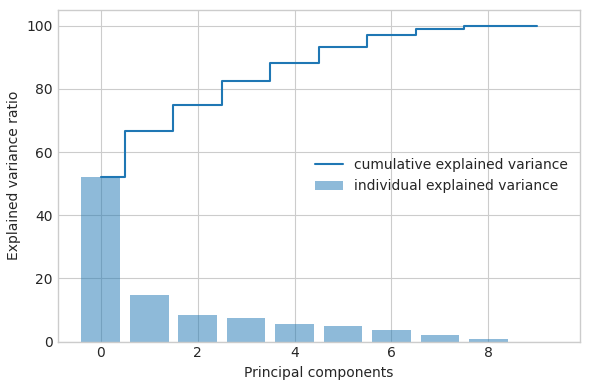

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(10), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(10), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [ ]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(10,1),
                      eig_pairs[1][1].reshape(10,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.21940992 -0.38977842]
 [-0.39662239 -0.01840276]
 [-0.40576223 -0.14170039]
 [-0.28396081  0.3799544 ]
 [-0.31479122  0.01292914]
 [-0.20157312  0.41086692]
 [ 0.00156891  0.68575153]
 [-0.40044602  0.04296907]
 [-0.35198061  0.03194383]
 [-0.35397483 -0.20295094]]


In [ ]:
Y = X_std.dot(matrix_w)


In [ ]:
Y

array([[-0.19765723,  0.5380899 ],
       [ 1.21126969,  0.93313901],
       [ 0.41448767,  0.84852628],
       ...,
       [-6.73630432, -2.48391753],
       [-7.47823741, -2.92194657],
       [-6.45570324, -2.19190377]])

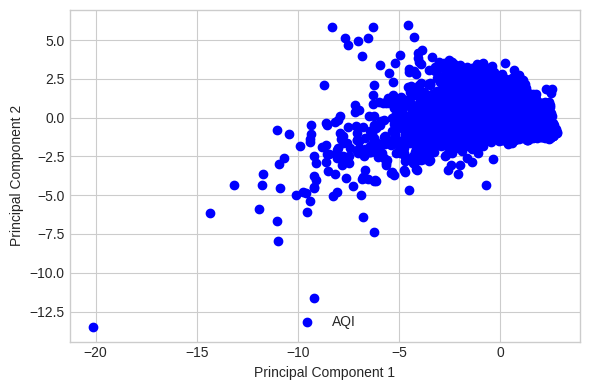

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.scatter(Y[:, 0], Y[:, 1], c='blue', label='AQI')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [ ]:
data = pd.DataFrame(Y, columns=['col1', 'col2'])


In [ ]:
data

col1      col2
0    -0.197657  0.538090
1     1.211270  0.933139
2     0.414488  0.848526
3    -0.606004 -0.056695
4    -1.009638  0.875476
...        ...       ...
5086 -1.835952 -0.170261
5087 -4.307215 -1.096530
5088 -6.736304 -2.483918
5089 -7.478237 -2.921947
5090 -6.455703 -2.191904

[5091 rows x 2 columns]

In [ ]:
X= data.values
y = df['AQI'].values

In [ ]:
X.shape

(5091, 2)

In [ ]:
y.shape

(5091,)

In [ ]:
X_train,X_test, Y_train, Y_test = train_test_split(X,y, test_size= 0.2, random_state=30)

In [ ]:
X_train

array([[ 1.2196729 ,  1.15619031],
       [-3.17269662, -0.65266829],
       [-2.32090341, -0.27781216],
       ...,
       [ 1.72350627, -0.98439876],
       [-1.9110869 ,  0.41285573],
       [-1.44663592,  1.69947606]])

In [ ]:
X_test

array([[-1.81067242,  0.90323514],
       [ 1.52787031, -0.74039308],
       [-1.43360486,  0.7078778 ],
       ...,
       [ 1.72455725, -0.3586325 ],
       [ 0.93050578, -0.76754466],
       [-1.95190853,  1.83386723]])

In [ ]:
Y_train

array([103, 118, 138, ...,  36, 137, 149])

In [ ]:
Y_test

array([135,  31, 136, ..., 115, 135, 125])

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [ ]:
lm=LinearRegression()
lm

LinearRegression()

In [ ]:
lm.fit(X_train,Y_train)


LinearRegression()

In [ ]:
rid=Ridge()
rid

Ridge()

In [ ]:
rid.fit(X_train,Y_train)


Ridge()

In [ ]:
la=Lasso()
la

Lasso()

In [ ]:
la.fit(X_train,Y_train)


Lasso()

In [ ]:
elNet=ElasticNet()
elNet

ElasticNet()

In [ ]:
elNet.fit(X_train,Y_train)


ElasticNet()

In [ ]:

pred_test_lm=lm.predict(X_test)
pred_test_rid=rid.predict(X_test)
pred_test_la=la.predict(X_test)

pred_test_elNet=elNet.predict(X_test)

In [ ]:
print("Linear Regression Model")
metrics.mean_squared_error(Y_test,pred_test_lm)



Linear Regression Model


546.8914939575785

In [ ]:
metrics.r2_score(Y_test,pred_test_lm)


0.6925737695629391

In [ ]:
lm.score(X_test,Y_test)


0.6925737695629391

In [ ]:

print("Ridge Regression Model")
metrics.mean_squared_error(Y_test,pred_test_rid)

Ridge Regression Model


546.896507005751

In [ ]:
metrics.r2_score(Y_test,pred_test_rid)


0.6925709515587835

In [ ]:

print("Lassso Regression Model")
metrics.mean_squared_error(Y_test,pred_test_la)

Lassso Regression Model


549.5184448282374

In [ ]:
metrics.r2_score(Y_test,pred_test_la)


0.6910970715110718

In [ ]:
print("ElasticNet Regression Model")
metrics.mean_squared_error(Y_test,pred_test_elNet)

ElasticNet Regression Model


596.4897709582888

In [ ]:
metrics.r2_score(Y_test,pred_test_elNet)


0.664692898306082

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
parameters={'alpha':[1,5,10,20,35,45,50,55,60,75,85,90,100]}
ridge_regressor=GridSearchCV(rid,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,Y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 5, 10, 20, 35, 45, 50, 55, 60, 75, 85, 90,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
ridge_regressor.best_params_


{'alpha': 20}

In [ ]:
ridge_regressor.best_score_


-545.3598782662399

In [ ]:
best_alpha = 20
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, Y_train)

# Predict on the test set
pred_test_ridge = ridge.predict(X_test)

# Calculate R-squared score and Mean Squared Error
r2_ridge = metrics.r2_score(Y_test, pred_test_ridge)
mse_ridge = metrics.mean_squared_error(Y_test, pred_test_ridge)

print("Ridge Regression Model")
print("R-squared Score:", r2_ridge)
print("Mean Squared Error:", mse_ridge)



Ridge Regression Model
R-squared Score: 0.6925144165807193
Mean Squared Error: 546.9970790960713


In [ ]:

parameters={'alpha':[1e-4,1e-3,1e-2,1,5,10,20,35,45,50,55,60,75,85,90,100]}
lasso_regressor=GridSearchCV(la,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 1, 5, 10, 20, 35, 45,
                                   50, 55, 60, 75, 85, 90, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
lasso_regressor.best_params_


{'alpha': 0.01}

In [ ]:
lasso_regressor.best_score_


-545.3673075239197

In [ ]:
best_alpha = 0.01
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train, Y_train)

# Predict on the test set
pred_test_lasso = lasso.predict(X_test)

# Calculate R-squared score and Mean Squared Error
r2_lasso = metrics.r2_score(Y_test, pred_test_lasso)
mse_lasso = metrics.mean_squared_error(Y_test, pred_test_lasso)

print("lasso Regression Model")
print("R-squared Score:", r2_lasso)
print("Mean Squared Error:", mse_lasso)



lasso Regression Model
R-squared Score: 0.6925639275684536
Mean Squared Error: 546.9090022328486


In [ ]:

parameters={'alpha':[1e-4,1e-3,1e-2,1,5,10,20,35,45,50,55,60,75,85,90,100]}
elNet_regressor=GridSearchCV(elNet,parameters,scoring='neg_mean_squared_error',cv=5)
elNet_regressor.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 1, 5, 10, 20, 35, 45,
                                   50, 55, 60, 75, 85, 90, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
elNet_regressor.best_params_


{'alpha': 0.01}

In [ ]:
elNet_regressor.best_score_


-545.3601937033384

In [ ]:
best_alpha = 0.01
elastic = ElasticNet(alpha=best_alpha)
elastic.fit(X_train, Y_train)

# Predict on the test set
pred_test_elastic = elastic.predict(X_test)

# Calculate R-squared score and Mean Squared Error
r2_elastic = metrics.r2_score(Y_test, pred_test_elastic)
mse_elastic = metrics.mean_squared_error(Y_test, pred_test_elastic)

print("elastic Regression Model")
print("R-squared Score:", r2_elastic)
print("Mean Squared Error:", mse_elastic)



elastic Regression Model
R-squared Score: 0.6925079863826
Mean Squared Error: 547.008518005012


Text(0.5, 1.0, 'Linear Regression')

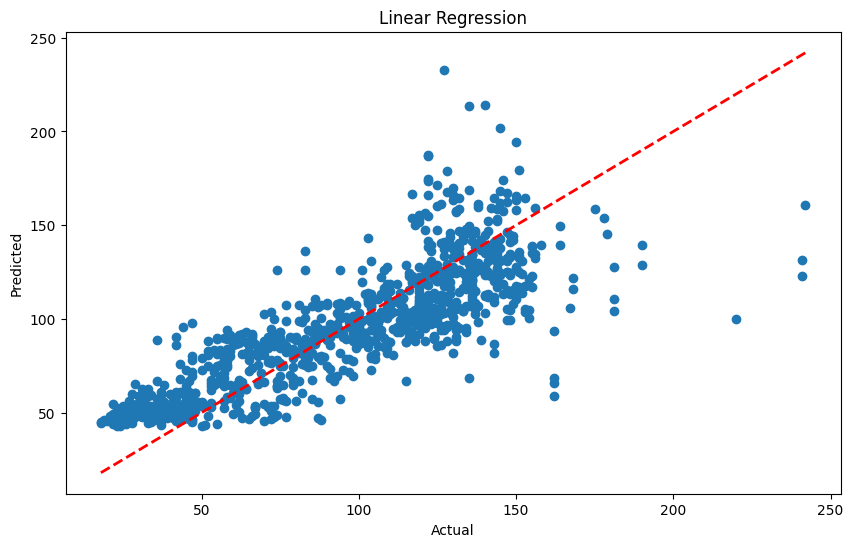

In [ ]:
plt.figure(figsize=(10, 6))

# Linear Regression
plt.subplot(1, 1, 1)
plt.scatter(Y_test, pred_test_lm)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')

Text(0.5, 1.0, 'Ridge Regression')

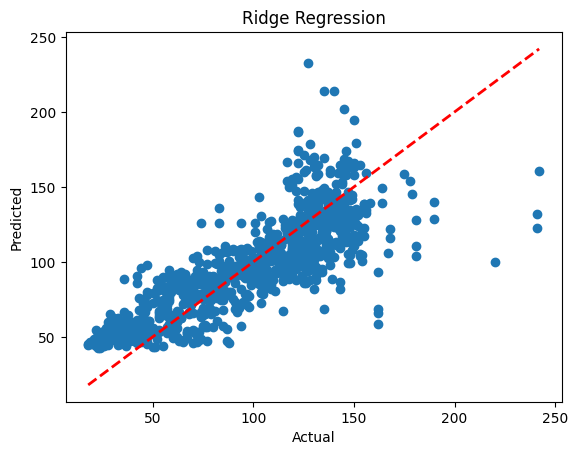

In [ ]:
# Ridge Regression
plt.subplot(1, 1, 1)
plt.scatter(Y_test, pred_test_rid)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Regression')

Text(0.5, 1.0, 'Lasso Regression')

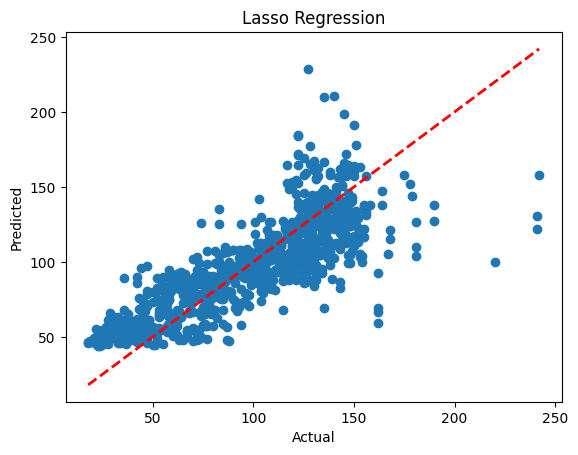

In [ ]:
plt.subplot(1, 1, 1)
plt.scatter(Y_test, pred_test_la)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Lasso Regression')

Text(0.5, 1.0, 'ElasticNet Regression')

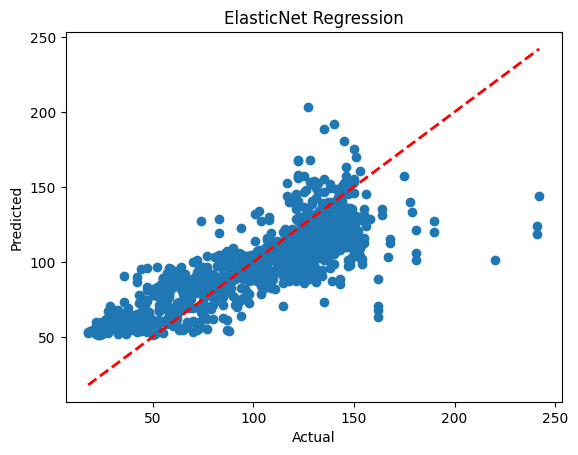

In [ ]:
plt.subplot(1, 1, 1)
plt.scatter(Y_test, pred_test_elNet)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('ElasticNet Regression')

In [ ]:
from sklearn.svm import SVR
svr_linear = SVR(kernel='linear',gamma='scale', C=1.0, epsilon=0.1)
svr_linear.fit(X_train, Y_train)

SVR(kernel='linear')

In [ ]:
svr_linear.score(X_test,Y_test)


0.6863998307176343

In [ ]:
svr_rbf = SVR(kernel='rbf',gamma='scale', C=1.0, epsilon=0.1)
svr_rbf.fit(X_train, Y_train)

SVR()

In [ ]:
svr_rbf.score(X_test,Y_test)


0.7628288297420622

In [ ]:
from sklearn.metrics import mean_squared_error


In [ ]:
print("RMSE for linear SVR:",np.sqrt(mean_squared_error(Y_test,svr_linear.predict(X_test))))
print("RMSE for RBF kernelized SVR:",np.sqrt(mean_squared_error(Y_test,svr_rbf.predict(X_test))))

RMSE for linear SVR: 23.61936777581559
RMSE for RBF kernelized SVR: 20.540502911730186


In [ ]:
from sklearn.metrics import r2_score
print('r2 score :', r2_score(Y_test,svr_linear.predict(X_test)))
print('r2 score :', r2_score(Y_test,svr_rbf.predict(X_test)))


r2 score : 0.6863998307176343
r2 score : 0.7628288297420622


In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
params = {'C':[0.01,0.05,0.1,0.5,1,2,5,20,30,40,50,100,200],'epsilon':[0.1,0.2,0.5,1,2,5,0.01]}


In [ ]:
grid = GridSearchCV(svr_rbf,param_grid=params,cv=5,scoring='r2',verbose=1,return_train_score=True)


In [ ]:
grid.fit(X_train,Y_train)


Fitting 5 folds for each of 91 candidates, totalling 455 fits


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 20, 30, 40, 50,
                               100, 200],
                         'epsilon': [0.1, 0.2, 0.5, 1, 2, 5, 0.01]},
             return_train_score=True, scoring='r2', verbose=1)

In [ ]:
grid.best_estimator_


SVR(C=100, epsilon=5)

In [ ]:
svr_best=SVR(kernel='rbf',gamma='scale', C=100.0, epsilon=5.0)
svr_best.fit(X_train, Y_train)

SVR(C=100.0, epsilon=5.0)

In [ ]:
svr_best.score(X_test,Y_test)


0.770931351062812

In [ ]:
print("RMSE for RBF kernelized SVR:",np.sqrt(mean_squared_error(Y_test,svr_best.predict(X_test))))


RMSE for RBF kernelized SVR: 20.18658949636501


In [ ]:
print('Accuracy',100- (np.mean(np.abs((Y_test - svr_best.predict(X_test)) / Y_test)) * 100))


Accuracy 80.1617899452525
